<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/heat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2D Heat Equation Simulator using FDM
* FDM stands for **Finite Difference Method**.

In [1]:
%pip install -q https://samyzaf.com/fdmtools-1.zip
from fdmtools import *

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [2]:
plate_length = 40
max_time = 200
fskip = 1
vidfile = "heat1.mp4"
alpha = 2
dx = 1
dy = 1
dt = dx**2 / (4 * alpha)
gamma = (alpha * dt) / (dx ** 2)
frames = range(0,max_time,fskip)
pb = ProgressBar(max_time//fskip)

def solve(u):
  for k in range(0, max_time-1, 1):
    for i in range(1, plate_length-1, dx):
      for j in range(1, plate_length-1, dx):
        fdm = u[i+1,j,k] + u[i-1,j,k] + u[i,j+1,k] + u[i,j-1,k] - 4*u[i,j,k]
        u[i,j,k+1] = u[i,j,k] + gamma * fdm
  return u

def plot_heatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()
    plt.title(f"Temperature at t = {k*dt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

def animate(k):
    plot_heatmap(u[:,:,k], k)
    pb.advance()

In [3]:
# Create solution array u[i][j][k]
u = np.empty((plate_length, plate_length, max_time))
# u is a discrete numpy 3D-array
# modeling the solution u(x,y,t) for the heat equation
#     u_t = alpha * (u_xx + u_yy)
# For detailed explanations:
# https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a

In [4]:
# Boundary functions: f1, f2, g1, g2
f1 = lambda i: 100 * (i*dx / plate_length) ** (1/3)
f2 = lambda i: 100*(0.7 + 0.3*np.sin(5*np.pi*i*dx/plate_length))
#f2 = lambda i: 0
g1 = lambda j: 100 * (j*dy / plate_length) ** (1/2)
g2 = lambda j: 0
#g2 = lambda j: 50 + 50 * np.sin(5*np.pi*j*dy / plate_length)
# Initial temperature f(x,y) on the whole plate at t=0.
f = lambda i,j: 0
#f = lambda i,j: 50 * (i*dx + j*dy)/plate_length

In [5]:
# Boundary conditions
# Initial condition at t=0: temperature everywhere inside the plate
#u.fill(0.0)
u[:,:,0] = [[f(i,j) for i in range(plate_length)] for j in range(plate_length)]
# Bottom side (row=0,column=all,time=all)
u[0,:,:] = [[f1(i)] for i in range(plate_length)]
# Top side (row=plate_length-1, column=all, time=all)
u[plate_length-1,:,:] =  [[f2(i)] for i in range(plate_length)]
# Left side (row=all,column=0,time=all)
u[:,0,:] = [[g1(j)] for j in range(plate_length)]
# Right side (row=all, column=plate_length-1, time=all)
u[:,(plate_length-1),:] = [[g2(j)] for j in range(plate_length)]


Progress: 100%   
Time: 81.44 seconds
Done!


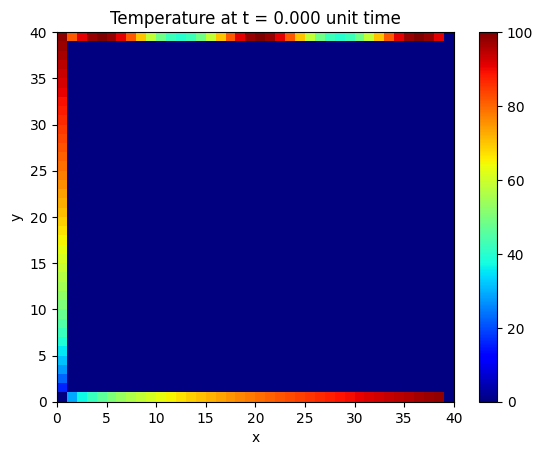

In [6]:
u = solve(u)
anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=frames, repeat=False)
anim.save(vidfile, fps=30)
print("Done!")

In [7]:
HTML(play_mp4(vidfile, width=640))